### Data Generation/Collection for faces:
Stores the Face information into numpy arrays

1. Read and show video stream, capture images
2. Detect Faces and show bounding box (haarcascade)
3. Flatten the largest face image(gray scale) and save in a numpy array
4. Repeat the above for multiple people to generate training data



In [4]:
import cv2, numpy as np

- If there is error in capturing video in any of these programs, then click on top left corner of **Devices** in your ubuntu and click on webcam and then click on the available devices.

### Step 1 & 2:

In [6]:
cap = cv2.VideoCapture(0)  # Start Camera
eye_cascade = cv2.CascadeClassifier("./train/third-party/frontalEyes35x16.xml") # eye Detection
nose_cascade = cv2.CascadeClassifier("./train/third-party/Nose18x15.xml")  # nose detection

while True:
    ret,frame = cap.read()  # read the frame
    if ret==False:
        continue
    
    cv2.imshow("Frame", frame)
    
    eyes = eye_cascade.detectMultiScale(frame,1.3,5)
    nose = nose_cascade.detectMultiScale(frame,1.3,5)
    print(eyes, nose)
    
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[235 236 169  77]] [[291 290  55  46]]
[[236 235 169  77]] [[291 289  55  46]]
() [[291 291  55  46]]
[[253 246 130  59]] [[290 290  56  47]]
[[234 237 169  77]
 [252 247 130  59]] [[291 290  55  46]]
[[235 235 169  77]] [[291 291  54  45]]
[[253 247 130  59]] [[291 290  53  45]]
[[252 248 130  59]] [[291 291  54  45]]
[[251 247 130  59]] [[291 290  56  47]]
[[252 249 130  59]] [[293 291  53  44]]
() [[292 291  52  44]]
[[234 237 169  77]
 [252 250 130  59]] [[292 293  52  44]]
[[234 238 169  77]] [[291 293  55  46]]
() [[293 293  53  45]]
[[255 250 130  59]] [[290 292  57  48]]
[[234 238 169  77]
 [254 251 130  59]] [[291 293  53  44]]
[[234 238 169  77]] [[292 293  54  46]]
[[235 238 169  77]] [[292 294  52  44]]
[[252 250 130  59]] [[288 293  58  49]]
() [[292 292  53  45]]
[[253 250 130  59]] [[293 292  54  45]]
[[252 249 130  59]] [[292 292  53  44]]
[[253 248 130  59]] [[291 291  55  46]]
[[252 248 130  59]] [[291 290  56  47]]
[[253 246 130  59]] [[291 289  55  46]]
[[251 244 1

- Let us also add bounding rectangle in the image now.

In [4]:
cap = cv2.VideoCapture(0)  # Start Camera
eye_cascade = cv2.CascadeClassifier("./train/third-party/frontalEyes35x16.xml") # eye Detection
nose_cascade = cv2.CascadeClassifier("./train/third-party/Nose18x15.xml")  # nose detection

while True:
    ret,frame = cap.read()  # read the frame
    if ret==False:
        continue
        
    eyes = eye_cascade.detectMultiScale(frame,1.3,5)
    nose = nose_cascade.detectMultiScale(frame,1.3,5)
    print(eyes, nose)
    
    for i in eyes:
        ex,ey,ew,eh = i
        cv2.rectangle(frame, (ex,ey), (ex+ew,ey+eh), (0,255,255),2)
    for i in nose:
        nx,ny,nw,nh = i
        cv2.rectangle(frame, (nx,ny), (nx+nw,ny+nh), (0,255,255),2)
    cv2.imshow("Frame", frame)
    
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

() ()
() ()
[[220 222 220 100]
 [243 237 169  77]] [[296 290  80  66]]
[[223 223 169  77]] [[277 275  76  63]]
[[208 223 169  77]] [[261 275  78  65]]
() ()
[[133 167 220 100]] ()
[[158 158 220 100]] ()
() ()
[[165 182 169  77]] [[221 231  70  58]]
[[170 172 169  77]] [[223 226  74  62]]
[[181 179 169  77]] [[236 235  68  57]]
[[190 189 169  77]] [[240 238  76  63]]
[[197 193 169  77]] [[250 246  70  58]]
[[202 198 169  77]] [[255 249  67  56]]
[[206 201 169  77]] [[263 255  62  52]]
[[210 204 169  77]] [[264 254  67  56]]
[[210 200 169  77]] [[268 253  63  52]]
[[211 198 169  77]] [[268 251  63  52]]
[[209 197 169  77]] [[265 249  63  53]]
[[207 200 169  77]] [[263 251  66  55]]
[[209 200 169  77]] [[264 250  63  52]]
[[207 198 169  77]] [[263 248  64  53]]
[[205 200 169  77]] [[263 249  65  54]]
[[211 199 169  77]] [[265 250  65  55]]
[[209 198 169  77]] [[267 251  62  52]]
[[207 197 169  77]] [[262 248  67  56]]
[[207 198 169  77]] [[263 248  64  54]]
[[206 197 169  77]] [[265 249  

In [1]:
import cv2
before = cv2.imread('./train/Jamie_Before.jpg')

eye_cascade = cv2.CascadeClassifier("./train/third-party/frontalEyes35x16.xml") # eye Detection
nose_cascade = cv2.CascadeClassifier("./train/third-party/Nose18x15.xml")  # nose detection

eyes = eye_cascade.detectMultiScale(before,1.3,5)  #scaling factor=1.05is best but slow
nose = nose_cascade.detectMultiScale(before,1.3,5)

offset=20 # define offset to take some extra part while cropping. See use in below implementation
# here in our case, there is only one eye and one nose. Thus for loop will execute only onve
# if there are multiple persons then we can sort and pick biggest element or smallest accordingly
for i in eyes:   
    ex,ey,ew,eh = i
    crop_eye = before[ey-offset:ey+eh+offset,ex-offset:ex+ew+offset]  # crop some extra part also
    cv2.imshow("Eyes part", crop_eye)
    
for i in nose:
    nx,ny,nw,nh = i
    crop_nose = before[ny-offset:ny+nh+offset,nx-offset:nx+nw+offset]  # crop some extra part also
    cv2.imshow("Nose Part", crop_nose)
    
cv2.rectangle(before, (ex,ey), (ex+ew,ey+eh), (0,255,255),2)
cv2.rectangle(before, (nx,ny), (nx+nw,ny+nh), (0,255,255),2)
print(crop_eye.shape, crop_nose.shape)

cv2.imshow("Image initially", before)

cv2.waitKey(0) # press any key to stop the program
cv2.destroyAllWindows()

(210, 411, 3) (146, 168, 3)


In [5]:
glasses = cv2.imread("./train/glasses.png", cv2.IMREAD_UNCHANGED)
glasses.shape

(221, 483, 4)

(221, 483, 4)


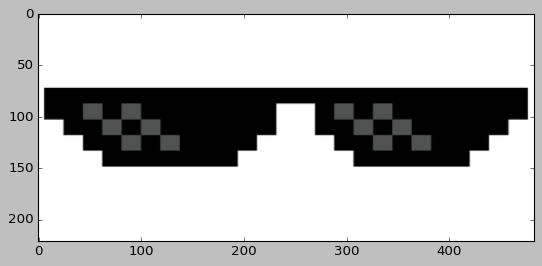

In [10]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./train/glasses.png", cv2.IMREAD_UNCHANGED)
plt.style.use('classic')
print(img.shape)

plt.imshow(img)
plt.show()

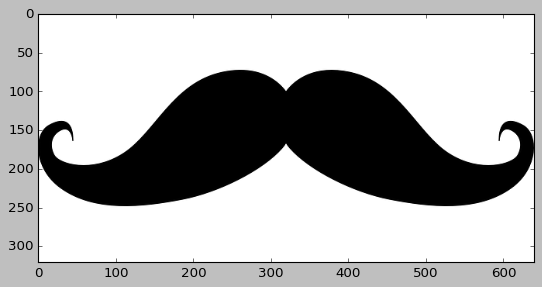

In [16]:
img = cv2.imread("./train/mustache.png", cv2.IMREAD_UNCHANGED)
plt.imshow(mustache)
plt.show()

## Let us make eye filter first:

In [20]:
import cv2
import numpy as np
eyes = cv2.CascadeClassifier("./train/third-party/frontalEyes35x16.xml")
if eyes.empty():
    raise IOError('Unable to load eyes or nose cascade classifier xml file')

before = cv2.imread('./train/Jamie_Before.jpg')
glasses = cv2.imread("./train/glasses.png", cv2.IMREAD_UNCHANGED)
# cv2.IMREAD_UNCHANGED helps you to read all the 4 channels of the image.

eye = eyes.detectMultiScale(before, 1.5, 5)
for (x,y,w,h) in eye:  # using for loop in case of multiple eyes
    (hg, wg) = glasses.shape[:2]  # h and w of glasses
    r = w / float(wg)   
    dim = (w, int(hg * r))   # pass w and hg*r  as dimensions for resizing array
    glasses2 = cv2.resize(glasses.copy(), dim, cv2.INTER_AREA)
    gh,gw = glasses2.shape[:2]  # height=no. of rows and width=no. of cols
    for i in range(0,gh):   # gh = no of rows
        for j in range(0,gw):   # gw = no of cols
            if glasses2[i,j,3]!=0:   # check if 4th channel(alpha) for every pixel is 0 or 1 
                before[y+i,x+j, :] = glasses2[i,j, :3]
                  # pass only BGR not BGRA as before has only 3channels(BGR)
                
cv2.imshow('Eye Filter', before)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Let us make mustache filter now

In [41]:
import cv2
import numpy as np
nose = cv2.CascadeClassifier("./train/third-party/Nose18x15.xml")
if nose.empty():
    raise IOError('Unable to load eyes or nose cascade classifier xml file')

before = cv2.imread('./train/Jamie_Before.jpg')
mustache = cv2.imread("./train/mustache.png", cv2.IMREAD_UNCHANGED)
# cv2.IMREAD_UNCHANGED helps you to read all the 4 channels of the image.

nose = nose.detectMultiScale(before, 1.3, 5)
nose = sorted(nose, key=lambda f: f[0]**f[1])  #sort according to area.
nx,ny,nw,nh = nose[-1]  # choose largest in case of multiple nose.

(hm, wm) = mustache.shape[:2]  # height and width of mustache as no_of_rows=hm and no_of_cols=wm  
r = nw / float(wm)
dim = (nw, int(hm * r))   # pass w and hg*r  as dimensions for resizing array
mustache2 = cv2.resize(mustache.copy(), dim, cv2.INTER_AREA)

mh,mw = mustache2.shape[:2]  # height=no. of rows and width=no. of cols
for i in range(0,mh):   # mh = no of rows
    for j in range(0,mw):   # mw = no of cols
        if mustache2[i,j,3]!=0:   # check if 4th channel(alpha) for every pixel is 0 or 1 
            before[ny+i,nx+j, :] = mustache2[i,j, :3]
            # pass only BGR not BGRA as before has only 3channels(BGR)

cv2.imshow('Mustache Filter', before)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
import cv2
import numpy as np
nose = cv2.CascadeClassifier("./train/third-party/Nose18x15.xml")
if nose.empty():
    raise IOError('Unable to load eyes or nose cascade classifier xml file')

before = cv2.imread('./train/Jamie_Before.jpg')
mustache = cv2.imread("./train/mustache.png", cv2.IMREAD_UNCHANGED)

nose = nose.detectMultiScale(before, 1.3, 5)
nose = sorted(nose, key=lambda f: f[0]**f[1])  
nx,ny,nw,nh = nose[-1]  

(hm, wm) = mustache.shape[:2]  
r = nw / float(wm)
dim = (nw, int(hm * r))   
mustache2 = cv2.resize(mustache.copy(), dim, cv2.INTER_AREA)

# change y such that mustache is asiigned at the end
ny = ny+nh-mh
nh = mh

mh,mw = mustache2.shape[:2]  
for i in range(0,mh):   # mh = no of rows
    for j in range(0,mw):   # mw = no of cols
        if mustache2[i,j,3]!=0:   
            before[ny+i,nx+j, :] = mustache2[i,j, :3]
            
cv2.imshow('Mustache Filter', before)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [98]:
import cv2
import numpy as np
nose = cv2.CascadeClassifier("./train/third-party/Nose18x15.xml")
if nose.empty():
    raise IOError('Unable to load eyes or nose cascade classifier xml file')

before = cv2.imread('./train/Jamie_Before.jpg')
mustache = cv2.imread("./train/mustache.png", cv2.IMREAD_UNCHANGED)

nose = nose.detectMultiScale(before, 1.3, 5)
nose = sorted(nose, key=lambda f: f[0]**f[1])  
nx,ny,nw,nh = nose[-1]  

offset = 15 # try different values
nx,ny,nw,nh = nx-offset, ny-offset, nw+2*offset, nh+2*offset

(hm, wm) = mustache.shape[:2]  
r = nw / float(wm)
dim = (nw, int(hm * r))   
mustache2 = cv2.resize(mustache.copy(), dim, cv2.INTER_AREA)

ny = ny+nh-mh
nh = mh

mh,mw = mustache2.shape[:2]  
for i in range(0,mh):   # mh = no of rows
    for j in range(0,mw):   # mw = no of cols
        if mustache2[i,j,3]!=0:   
            before[ny+i,nx+j, :] = mustache2[i,j, :3]
            
cv2.imshow('Mustache Filter', before)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Let us check it for our training data

In [107]:
import cv2
import numpy as np
eyes = cv2.CascadeClassifier("./train/third-party/frontalEyes35x16.xml")
nose = cv2.CascadeClassifier("./train/third-party/Nose18x15.xml")
if eyes.empty() or nose.empty():
    raise IOError('Unable to load eyes or nose cascade classifier xml file')

before = cv2.imread('./train/Jamie_Before.jpg')
glasses = cv2.imread("./train/glasses.png", cv2.IMREAD_UNCHANGED)
# cv2.IMREAD_UNCHANGED helps you to read all the 4 channels of the image.

eye = eyes.detectMultiScale(before, 1.3, 5)
for (x,y,w,h) in eye:
    (hg, wg) = glasses.shape[:2]
    r = w / float(wg)
    dim = (w, int(hg * r))
    glasses2 = cv2.resize(glasses.copy(), dim, cv2.INTER_AREA)
#     glasses2 = glasses2[:,:,:3]
    gw,gh,gc = glasses2.shape
    for i in range(0,gw):
        for j in range(0,gh):
            if glasses2[i,j][3]!=0:
                before[y+i,x+j, :] = glasses2[i,j, :3]

mustache = cv2.imread("./train/mustache.png", cv2.IMREAD_UNCHANGED)                
nose = nose.detectMultiScale(before, 1.3, 5)
for (x,y,w,h) in nose:
    
    x,y,w,h = x-5, y-10, w+20, h+20  # customize these accordingly

    (hm, wm) = mustache.shape[:2]
    r = w / float(wm)
    dim = (w, int(hm * r))
    mustache2 = cv2.resize(mustache.copy(), dim, cv2.INTER_AREA)
#     mustache2 = mustache2[:,:,:3]
    mh,mw,mc = mustache2.shape
    y  = y + h - mh + 10   # increase height by 10 more to show mustache more below the nose
    h = mh
    for i in range(0,mh):
        for j in range(0,mw):
            if mustache2[i,j][3]!=0:
                before[y+i,x+j, :] = mustache2[i,j, :3]
                
after = cv2.imread("./train/Jamie_After.jpg")
cv2.imshow('Predicter Filter image', before)
cv2.imshow("After", after)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Tesing Part:

In [99]:
import cv2
import numpy as np
eyes = cv2.CascadeClassifier("./train/third-party/frontalEyes35x16.xml")
nose = cv2.CascadeClassifier("./train/third-party/Nose18x15.xml")
if eyes.empty() or nose.empty():
    raise IOError('Unable to load eyes or nose cascade classifier xml file')

before = cv2.imread('./test/Before.png')
glasses = cv2.imread("./train/glasses.png", cv2.IMREAD_UNCHANGED)
# cv2.IMREAD_UNCHANGED helps you to read all the 4 channels of the image.

eye = eyes.detectMultiScale(before, 1.3, 5)
for (x,y,w,h) in eye:
    x,y,w,h = x-10, y+5, w+20, h+10
    (hg, wg) = glasses.shape[:2]
    r = w / float(wg)
    dim = (w, int(hg * r))
    glasses2 = cv2.resize(glasses.copy(), dim, cv2.INTER_AREA)
#     glasses2 = glasses2[:,:,:3]
    gw,gh,gc = glasses2.shape
    for i in range(0,gw):
        for j in range(0,gh):
            if glasses2[i,j][3]!=0:
                before[y+i,x+j, :] = glasses2[i,j, :3]

mustache = cv2.imread("./train/mustache.png", cv2.IMREAD_UNCHANGED)                
nose = nose.detectMultiScale(before, 1.3, 5)
for (x,y,w,h) in nose:
    
    x,y,w,h = x-5, y-10, w+20, h+20  # customize these accordingly

    (hm, wm) = mustache.shape[:2]
    r = w / float(wm)
    dim = (w, int(hm * r))
    mustache2 = cv2.resize(mustache.copy(), dim, cv2.INTER_AREA)
#     mustache2 = mustache2[:,:,:3]
    mh,mw,mc = mustache2.shape
    y  = y + h - mh + 10   # increase height by 10 more to show mustache more below the nose
    h = mh
    for i in range(0,mh):
        for j in range(0,mw):
            if mustache2[i,j][3]!=0:
                before[y+i,x+j, :] = mustache2[i,j, :3]
                
cv2.imshow('Predicter Filter image', before)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [90]:
import pandas as pd
before = np.reshape(before, (before.shape[0]*before.shape[1], before.shape[2]))
df = pd.DataFrame(before, columns=["Channel 1", "Channel 2", "Channel 3"])
df.to_csv("Output.csv", index= False)